M. Kolins "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

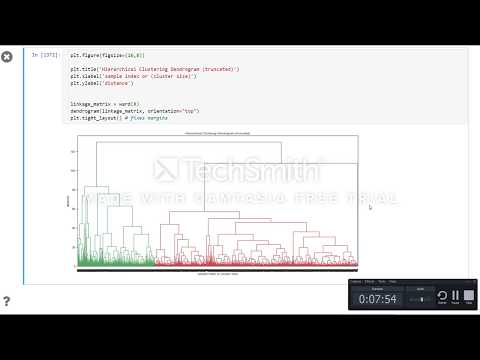

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y7xjCZwhywA')

## Problem Statement

The purpose of this project is to find and develop a model for accurate future predictive analysis. This analysis will help future consumers understand what drives a IMDB score and what future movies will score.  

# Import Data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

import pingouin as pg

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#pip install scikit-plot (optional)
import scikitplot as skplt

import warnings
warnings.filterwarnings("ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# advanced algorthms
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Understanding

## Load Data

In [9]:
df=pd.read_csv('movie.csv')
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                 723.000   178.000   
1  Color     Gore Verbinski                 302.000   169.000   
2  Color         Sam Mendes                 602.000   148.000   
3  Color  Christopher Nolan                 813.000   164.000   
4    NaN        Doug Walker                     nan       nan   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                    0.000                 855.000  Joel David Moore   
1                  563.000                1000.000     Orlando Bloom   
2                    0.000                 161.000      Rory Kinnear   
3                22000.000               23000.000    Christian Bale   
4                  131.000                     nan        Rob Walker   

   actor_1_facebook_likes         gross                           genres  ...  \
0                1000.000 760505847.000  Action|Adventure|Fantasy|Sci-Fi  ...   
1               40000.000 309404152.000         Action|Adventure|Fantasy  ...   
2               11000.000 200074175.000        Action|Adventure|Thriller  ...   
3               27000.000 448130642.000                  Action|Thriller  ...   
4                 131.000           nan                      Documentary  ...   

  num_user_for_reviews language  country  content_rating        budget  \
0             3054.000  English      USA           PG-13 237000000.000   
1             1238.000  English      USA           PG-13 300000000.000   
2              994.000  English       UK           PG-13 245000000.000   
3             2701.000  English      USA           PG-13 250000000.000   
4                  nan      NaN      NaN             NaN           nan   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0    2009.000                936.000      7.900         1.780   
1    2007.000               5000.000      7.100         2.350   
2    2015.000                393.000      6.800         2.350   
3    2012.000              23000.000      8.500         2.350   
4         nan                 12.000      7.100           nan   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

Display of the imported data

### Data Info 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

Information on the data to help in the ETL process

### Data Statistics

In [11]:
df.describe()

num_critic_for_reviews  duration  director_facebook_likes  \
count                4993.000  5028.000                 4939.000   
mean                  140.194   107.201                  686.509   
std                   121.602    25.197                 2813.329   
min                     1.000     7.000                    0.000   
25%                    50.000    93.000                    7.000   
50%                   110.000   103.000                   49.000   
75%                   195.000   118.000                  194.500   
max                   813.000   511.000                23000.000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count                5020.000                5036.000      4159.000   
mean                  645.010                6560.047  48468407.527   
std                  1665.042               15020.759  68452990.439   
min                     0.000                   0.000       162.000   
25%                   133.000                 614.000   5340987.500   
50%                   371.500                 988.000  25517500.000   
75%                   636.000               11000.000  62309437.500   
max                 23000.000              640000.000 760505847.000   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count         5043.000                   5043.000              5030.000   
mean         83668.161                   9699.064                 1.371   
std         138485.257                  18163.799                 2.014   
min              5.000                      0.000                 0.000   
25%           8593.500                   1411.000                 0.000   
50%          34359.000                   3090.000                 1.000   
75%          96309.000                  13756.500                 2.000   
max        1689764.000                 656730.000                43.000   

       num_user_for_reviews          budget  title_year  \
count              5022.000        4551.000    4935.000   
mean                272.771    39752620.436    2002.471   
std                 377.983   206114898.449      12.475   
min                   1.000         218.000    1916.000   
25%                  65.000     6000000.000    1999.000   
50%                 156.000    20000000.000    2005.000   
75%                 326.000    45000000.000    2011.000   
max                5060.000 12215500000.000    2016.000   

       actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  
count                5030.000    5043.000      4714.000              5043.000  
mean                 1651.754       6.442         2.220              7525.965  
std                  4042.439       1.125         1.385             19320.445  
min                     0.000       1.600         1.180                 0.000  
25%                   281.000       5.800         1.850                 0.000  
50%                   595.000       6.600         2.350               166.000  
75%                   918.000       7.200         2.350              3000.000  
max                137000.000       9.500        16.000            349000.000

Information on the data to help in the ETL process

### Quality Issues

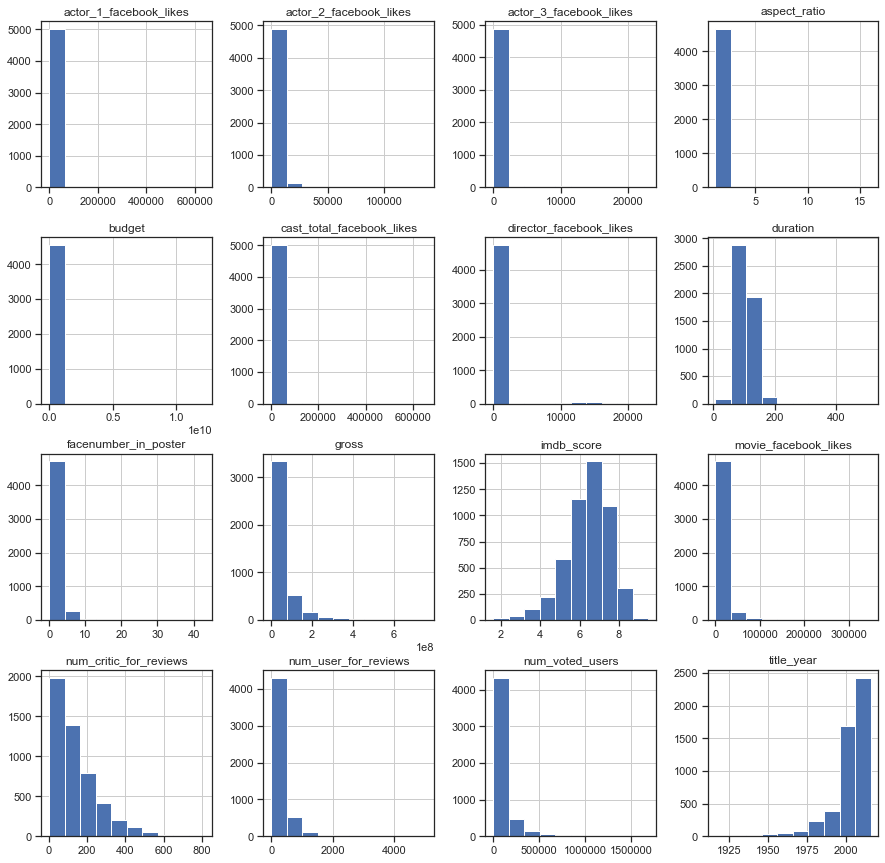

In [12]:
df.hist(figsize=(15,15));

### Find Null Values

In [13]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Data Cleaning 

## Remove Duplicates

Below I am removing the 45 duplicates found

In [14]:
len(df)

5043

In [15]:
len(df[df.duplicated(keep='first')])

45

In [16]:
df = df.drop_duplicates(keep='first')
len(df)

4998

## Remove Columns 

Movie Link is Irrelavant - Drop  

### Movie Link

In [17]:
df = df.drop('movie_imdb_link', axis=1)

### Language

USA Takes Up Large Majority - Drop

In [18]:
df.groupby('language').size()

language
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4662
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        17
Kannada          1
Kazakh           1
Korean           8
Mandarin        24
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64

In [19]:
df = df.drop('language',axis=1)

### Aspect Ratio

In [20]:
df['aspect_ratio'].describe()

count   4671.000
mean       2.221
std        1.391
min        1.180
25%        1.850
50%        2.350
75%        2.350
max       16.000
Name: aspect_ratio, dtype: float64

In [21]:
df.groupby('aspect_ratio').size()

aspect_ratio
1.180        1
1.200        1
1.330       67
1.370      100
1.440        1
1.500        2
1.660       64
1.750        3
1.770        1
1.780      108
1.850     1890
1.890        1
2.000        5
2.200       14
2.240        1
2.350     2337
2.390       15
2.400        3
2.550        2
2.760        3
4.000        7
16.000      45
dtype: int64

In [22]:
df.groupby('aspect_ratio')['imdb_score'].mean().sort_values(ascending=False)

aspect_ratio
1.180    8.500
1.750    7.900
1.200    7.800
4.000    7.671
2.240    7.600
1.440    7.500
2.200    7.379
2.760    7.367
2.400    7.233
16.000   7.191
1.500    7.150
1.370    7.126
1.660    7.122
1.330    7.042
2.000    6.840
2.390    6.633
2.550    6.550
2.350    6.478
1.850    6.371
1.890    6.300
1.770    6.300
1.780    6.190
Name: imdb_score, dtype: float64

In [23]:
df = df.drop('aspect_ratio', axis=1)

The Two Majority Holders have little differnce in average - Drop

### Color

In [24]:
df = df.drop('color', axis=1)

Color is not a determinig factor 

## Missing Values

In [25]:
df.isnull().sum()

director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
num_user_for_reviews          21
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
movie_facebook_likes           0
dtype: int64

### Gross & Budget

Vary Important Variables Must Drop All Rows 

In [26]:
df=df.dropna(subset=['gross','budget'])

In [27]:
df.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
num_user_for_reviews          0
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
movie_facebook_likes          0
dtype: int64

### facenumber_in_poster

In [28]:
df['facenumber_in_poster'].describe()

count   3851.000
mean       1.377
std        2.055
min        0.000
25%        0.000
50%        1.000
75%        2.000
max       43.000
Name: facenumber_in_poster, dtype: float64

In [29]:
df = df.fillna({'facenumber_in_poster': 1})

replaced null value with the std 50% of 1 

### Content Rating

In [30]:
df['content_rating'].describe()

count     3806
unique      12
top          R
freq      1723
Name: content_rating, dtype: object

In [31]:
df.groupby('content_rating').size()

content_rating
Approved       17
G              91
GP              1
M               2
NC-17           6
Not Rated      42
PG            573
PG-13        1314
Passed          3
R            1723
Unrated        24
X              10
dtype: int64

In [32]:
df = df.replace({'content_rating': "M"}, {'content_rating': "PG"})

In [33]:
df = df.replace({'content_rating': "GP"}, {'content_rating': "PG"})

In [34]:
df = df.replace({'content_rating': "X"}, {'content_rating': "NC-17"})

In [35]:
df = df.replace({'content_rating': "Not Rated"}, {'content_rating': "Unrated"})

In [36]:
df = df.replace({'content_rating': "Passed"}, {'content_rating': "PG-13"})

In [37]:
df = df.replace({'content_rating': "Approved"}, {'content_rating': "PG-13"})

In [38]:
df.groupby('content_rating').size()

content_rating
G            91
NC-17        16
PG          576
PG-13      1334
R          1723
Unrated      66
dtype: int64

Combined old rating systems into current and then dropped blank rows along with plot keywords

In [39]:
df=df.dropna(subset=['content_rating', 'plot_keywords'])

### Actor Names

In [40]:
df=df.dropna(subset=['actor_1_name' , 'actor_2_name' , 'actor_3_name'])

### Double Check Data Info

In [41]:
df.isnull().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779 entries, 0 to 5042
Data columns (total 24 columns):
director_name                3779 non-null object
num_critic_for_reviews       3779 non-null float64
duration                     3779 non-null float64
director_facebook_likes      3779 non-null float64
actor_3_facebook_likes       3779 non-null float64
actor_2_name                 3779 non-null object
actor_1_facebook_likes       3779 non-null float64
gross                        3779 non-null float64
genres                       3779 non-null object
actor_1_name                 3779 non-null object
movie_title                  3779 non-null object
num_voted_users              3779 non-null int64
cast_total_facebook_likes    3779 non-null int64
actor_3_name                 3779 non-null object
facenumber_in_poster         3779 non-null float64
plot_keywords                3779 non-null object
num_user_for_reviews         3779 non-null float64
country                      3779 non

All missing values have been delt with

## Remove  Â

In [43]:
df = df.replace("Â", "") 

In [44]:
df['movie_title'].head()


0                                      Avatar 
1    Pirates of the Caribbean: At World's End 
2                                     Spectre 
3                       The Dark Knight Rises 
5                                 John Carter 
Name: movie_title, dtype: object

Minor formatting fix 

## Create Genre Dataframe

In [45]:
# let's suppose you're interested in finding out the association between genre and imdb_score
# create a new data frame
g = df[['genres','imdb_score']]
# check your new data frame
g.head()

genres  imdb_score
0  Action|Adventure|Fantasy|Sci-Fi       7.900
1         Action|Adventure|Fantasy       7.100
2        Action|Adventure|Thriller       6.800
3                  Action|Thriller       8.500
5          Action|Adventure|Sci-Fi       6.600

In [46]:
# check how many rows
len(g)

3779

In [47]:
#now, separate a string of genres into multiple rows
# I borrowed the code below from https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

genres  imdb_score
0     Action       7.900
1  Adventure       7.900
2    Fantasy       7.900
3     Sci-Fi       7.900
4     Action       7.100

In [48]:
TMB = b[(b['imdb_score'] > 7.9)].sort_values('imdb_score',ascending=False)
TMB.head()

genres  imdb_score
5999  Drama       9.300
5998  Crime       9.300
9363  Crime       9.200
9364  Drama       9.200
8136  Crime       9.000

## New Columns

### Profit

In [49]:
df["Profit"] = df['gross'] - df['budget']
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                 723.000   178.000   
1     Gore Verbinski                 302.000   169.000   
2         Sam Mendes                 602.000   148.000   
3  Christopher Nolan                 813.000   164.000   
5     Andrew Stanton                 462.000   132.000   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                    0.000                 855.000  Joel David Moore   
1                  563.000                1000.000     Orlando Bloom   
2                    0.000                 161.000      Rory Kinnear   
3                22000.000               23000.000    Christian Bale   
5                  475.000                 530.000   Samantha Morton   

   actor_1_facebook_likes         gross                           genres  \
0                1000.000 760505847.000  Action|Adventure|Fantasy|Sci-Fi   
1               40000.000 309404152.000         Action|Adventure|Fantasy   
2               11000.000 200074175.000        Action|Adventure|Thriller   
3               27000.000 448130642.000                  Action|Thriller   
5                 640.000  73058679.000          Action|Adventure|Sci-Fi   

      actor_1_name  ...                                      plot_keywords  \
0      CCH Pounder  ...             avatar|future|marine|native|paraplegic   
1      Johnny Depp  ...  goddess|marriage ceremony|marriage proposal|pi...   
2  Christoph Waltz  ...                bomb|espionage|sequel|spy|terrorist   
3        Tom Hardy  ...  deception|imprisonment|lawlessness|police offi...   
5     Daryl Sabara  ...  alien|american civil war|male nipple|mars|prin...   

   num_user_for_reviews  country content_rating        budget title_year  \
0              3054.000      USA          PG-13 237000000.000   2009.000   
1              1238.000      USA          PG-13 300000000.000   2007.000   
2               994.000       UK          PG-13 245000000.000   2015.000   
3              2701.000      USA          PG-13 250000000.000   2012.000   
5               738.000      USA          PG-13 263700000.000   2012.000   

   actor_2_facebook_likes imdb_score movie_facebook_likes         Profit  
0                 936.000      7.900                33000  523505847.000  
1                5000.000      7.100                    0    9404152.000  
2                 393.000      6.800                85000  -44925825.000  
3               23000.000      8.500               164000  198130642.000  
5                 632.000      6.600                24000 -190641321.000  

[5 rows x 25 columns]

### Profit Margin

In [50]:
df["Profit_Margin"] = df['Profit'] / df['gross']
df.head()

director_name  num_critic_for_reviews  duration  \
0      James Cameron                 723.000   178.000   
1     Gore Verbinski                 302.000   169.000   
2         Sam Mendes                 602.000   148.000   
3  Christopher Nolan                 813.000   164.000   
5     Andrew Stanton                 462.000   132.000   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                    0.000                 855.000  Joel David Moore   
1                  563.000                1000.000     Orlando Bloom   
2                    0.000                 161.000      Rory Kinnear   
3                22000.000               23000.000    Christian Bale   
5                  475.000                 530.000   Samantha Morton   

   actor_1_facebook_likes         gross                           genres  \
0                1000.000 760505847.000  Action|Adventure|Fantasy|Sci-Fi   
1               40000.000 309404152.000         Action|Adventure|Fantasy   
2               11000.000 200074175.000        Action|Adventure|Thriller   
3               27000.000 448130642.000                  Action|Thriller   
5                 640.000  73058679.000          Action|Adventure|Sci-Fi   

      actor_1_name  ... num_user_for_reviews  country  content_rating  \
0      CCH Pounder  ...             3054.000      USA           PG-13   
1      Johnny Depp  ...             1238.000      USA           PG-13   
2  Christoph Waltz  ...              994.000       UK           PG-13   
3        Tom Hardy  ...             2701.000      USA           PG-13   
5     Daryl Sabara  ...              738.000      USA           PG-13   

         budget  title_year actor_2_facebook_likes  imdb_score  \
0 237000000.000    2009.000                936.000       7.900   
1 300000000.000    2007.000               5000.000       7.100   
2 245000000.000    2015.000                393.000       6.800   
3 250000000.000    2012.000              23000.000       8.500   
5 263700000.000    2012.000                632.000       6.600   

  movie_facebook_likes         Profit  Profit_Margin  
0                33000  523505847.000          0.688  
1                    0    9404152.000          0.030  
2                85000  -44925825.000         -0.225  
3               164000  198130642.000          0.442  
5                24000 -190641321.000         -2.609  

[5 rows x 26 columns]

## Write To CSV

In [51]:
df.to_csv("data/imdbdata.csv")

## Discribe Data

In [52]:
df.describe()

num_critic_for_reviews  duration  director_facebook_likes  \
count                3779.000  3779.000                 3779.000   
mean                  165.495   110.075                  798.544   
std                   123.662    22.642                 3055.155   
min                     2.000    37.000                    0.000   
25%                    75.000    95.000                   10.000   
50%                   137.000   106.000                   60.000   
75%                   223.000   120.000                  233.000   
max                   813.000   330.000                23000.000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count                3779.000                3779.000      3779.000   
mean                  758.063                7687.963  51916947.807   
std                  1856.108               15507.955  69646618.935   
min                     0.000                   0.000       162.000   
25%                   191.000                 738.000   7690579.000   
50%                   433.000                1000.000  29077547.000   
75%                   690.000               13000.000  66478202.500   
max                 23000.000              640000.000 760505847.000   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count         3779.000                   3779.000              3779.000   
mean        104276.933                  11407.826                 1.374   
std         151151.624                  19037.843                 2.041   
min             48.000                      0.000                 0.000   
25%          18601.500                   1885.000                 0.000   
50%          52888.000                   3969.000                 1.000   
75%         126819.500                  16140.500                 2.000   
max        1689764.000                 656730.000                43.000   

       num_user_for_reviews          budget  title_year  \
count              3779.000        3779.000    3779.000   
mean                332.056    45718649.971    2003.021   
std                 409.851   225331772.842       9.886   
min                   2.000         218.000    1927.000   
25%                 106.000    10000000.000    1999.000   
50%                 207.000    25000000.000    2005.000   
75%                 394.500    50000000.000    2010.000   
max                5060.000 12215500000.000    2016.000   

       actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
count                3779.000    3779.000              3779.000   
mean                 1990.035       6.462              9241.373   
std                  4506.016       1.054             21447.196   
min                     0.000       1.600                 0.000   
25%                   375.500       5.900                 0.000   
50%                   678.000       6.600               217.000   
75%                   973.000       7.200             11000.000   
max                137000.000       9.300            349000.000   

                Profit  Profit_Margin  
count         3779.000       3779.000  
mean       6198297.836        -49.530  
std      229095505.779       1020.341  
min   -12213298588.000     -55554.556  
25%      -10263053.500         -1.113  
50%        1273984.000          0.088  
75%       25427449.500          0.553  
max      523505847.000          1.000

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779 entries, 0 to 5042
Data columns (total 26 columns):
director_name                3779 non-null object
num_critic_for_reviews       3779 non-null float64
duration                     3779 non-null float64
director_facebook_likes      3779 non-null float64
actor_3_facebook_likes       3779 non-null float64
actor_2_name                 3779 non-null object
actor_1_facebook_likes       3779 non-null float64
gross                        3779 non-null float64
genres                       3779 non-null object
actor_1_name                 3779 non-null object
movie_title                  3779 non-null object
num_voted_users              3779 non-null int64
cast_total_facebook_likes    3779 non-null int64
actor_3_name                 3779 non-null object
facenumber_in_poster         3779 non-null float64
plot_keywords                3779 non-null object
num_user_for_reviews         3779 non-null float64
country                      3779 non

# Data Visulization

### Removal of Profit Outlier 

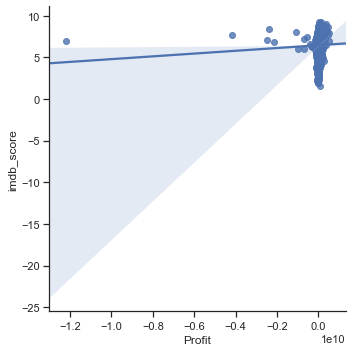

In [54]:
sns.lmplot('Profit', 'imdb_score', data=df, fit_reg=True, height = 5); 

In [55]:
pf=df.groupby('Profit').size().sort_values()

pf.head()

Profit
-12213298588.000    1
13894863.000        1
13955614.000        1
13983704.000        1
14008532.000        1
dtype: int64

In [56]:
pf = df[df['Profit'] != df['Profit'].min()].copy().sort_values('Profit')
pf.head(1)

director_name  num_critic_for_reviews  duration  \
3859  Chan-wook Park                 202.000   112.000   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
3859                    0.000                  38.000  Yeong-ae Lee   

      actor_1_facebook_likes      gross       genres  actor_1_name  ...  \
3859                 717.000 211667.000  Crime|Drama  Min-sik Choi  ...   

     num_user_for_reviews      country  content_rating         budget  \
3859              131.000  South Korea               R 4200000000.000   

      title_year actor_2_facebook_likes  imdb_score movie_facebook_likes  \
3859    2005.000                126.000       7.700                 4000   

              Profit  Profit_Margin  
3859 -4199788333.000     -19841.488  

[1 rows x 26 columns]

In [57]:
pf1 = pf[pf['Profit'] > -2000000].copy()

###  IMDB Score By Profit

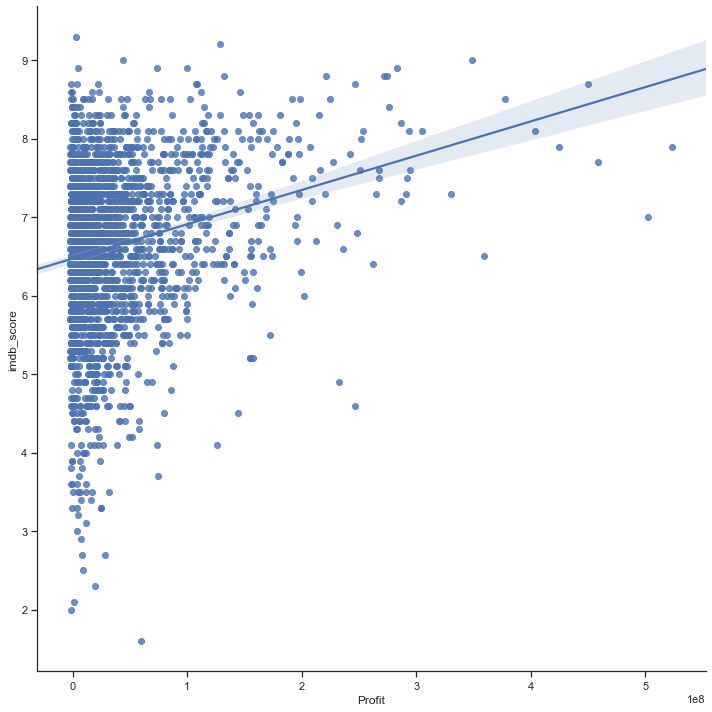

In [58]:
sns.lmplot('Profit', 'imdb_score', data=pf1, fit_reg=True, height = 10);

###  IMDB Score By Gross

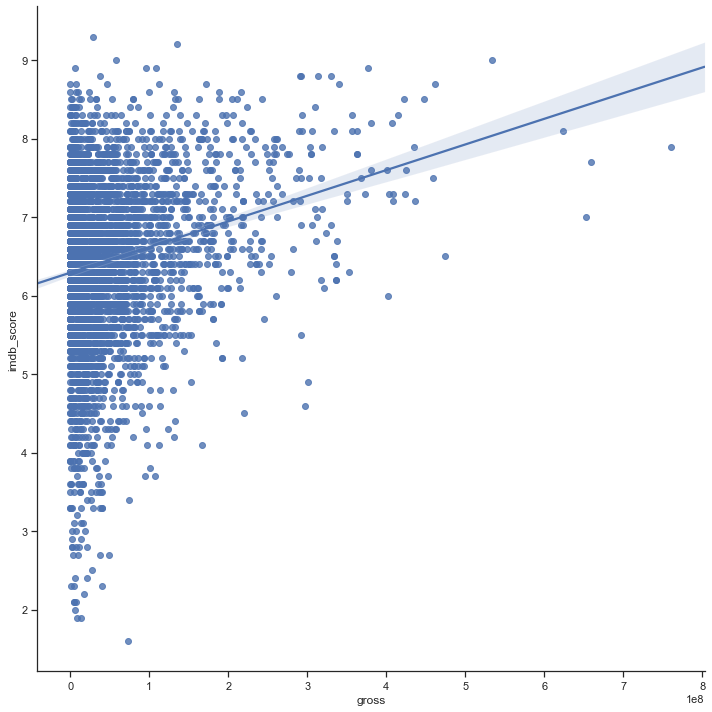

In [59]:
sns.lmplot('gross', 'imdb_score', data=df, fit_reg=True, height = 10);

###  IMDB Score By Duration

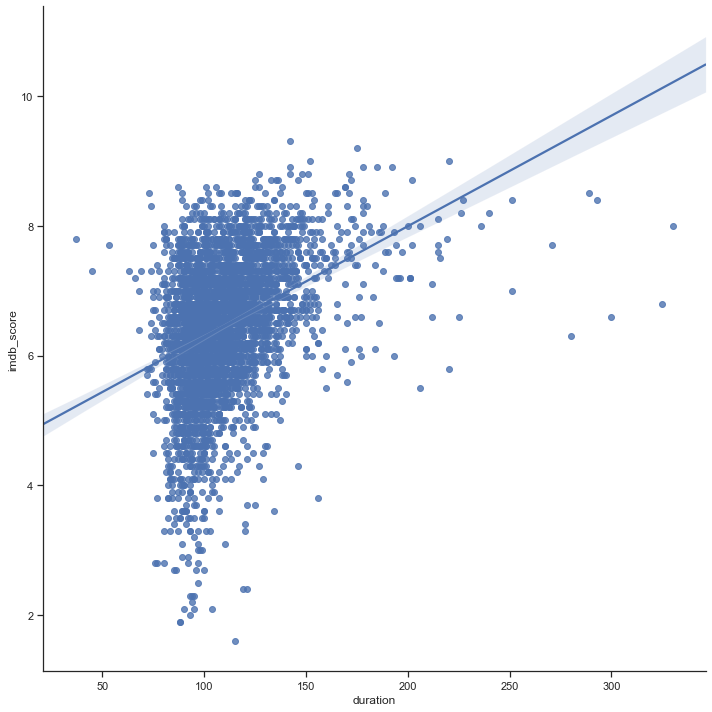

In [60]:
sns.lmplot('duration', 'imdb_score', data=df, fit_reg=True, height = 10);

###  IMDB Score By Title_Year

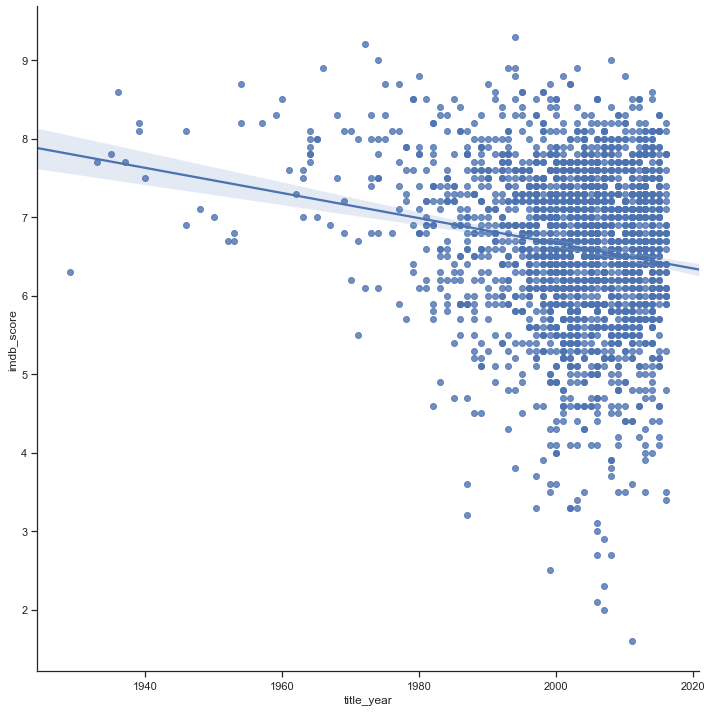

In [61]:
sns.lmplot('title_year', 'imdb_score', data=pf1, fit_reg=True, height = 10);

###  IMDB Score By Number of Votes by User

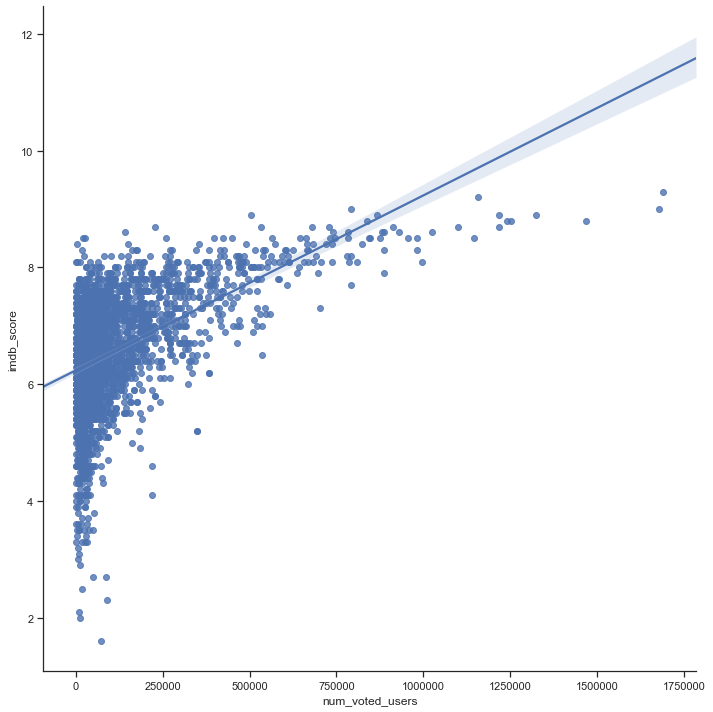

In [62]:
sns.lmplot('num_voted_users', 'imdb_score', data=pf1, fit_reg=True, height = 10);

### Average IMDB Score by Content Rating

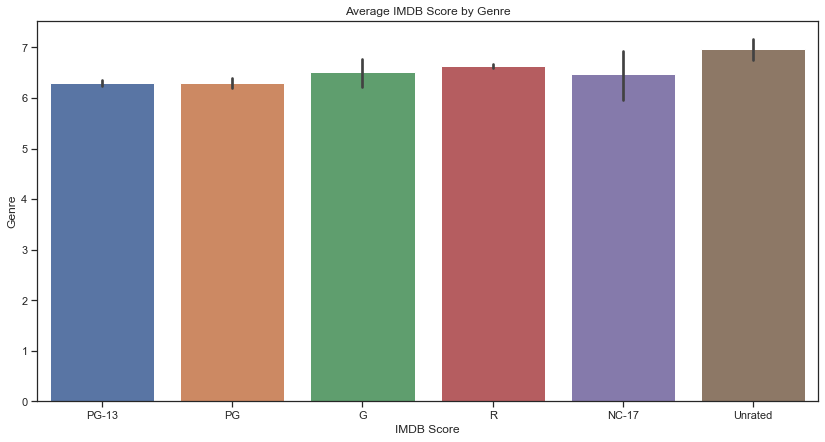

In [63]:
plt.figure(figsize=(14,7))
plt.title("Average IMDB Score by Genre")
sns.barplot(x='content_rating',y='imdb_score',data=df)
plt.xlabel('IMDB Score')
plt.ylabel("Genre"); 

# Correlation Analyis 

## Correlation Analyis  Data Frame ( All )

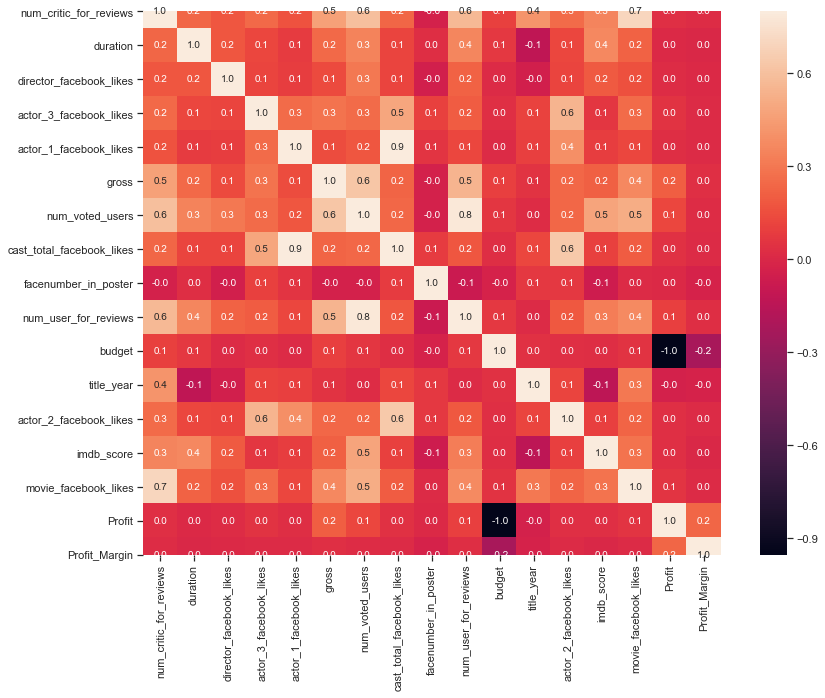

In [64]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

## Plotly Example

In [65]:
import plotly.graph_objects as go
import plotly.express as px

In [66]:
pf2 = df[df['Profit'] > 0 ].copy()

In [67]:
px.scatter(pf2, x="imdb_score", y="gross", color="content_rating", hover_name='movie_title', size='Profit')

# Modeling Analysis 

# 1. Regression

## Dummy Variables


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3779 entries, 0 to 5042
Data columns (total 26 columns):
director_name                3779 non-null object
num_critic_for_reviews       3779 non-null float64
duration                     3779 non-null float64
director_facebook_likes      3779 non-null float64
actor_3_facebook_likes       3779 non-null float64
actor_2_name                 3779 non-null object
actor_1_facebook_likes       3779 non-null float64
gross                        3779 non-null float64
genres                       3779 non-null object
actor_1_name                 3779 non-null object
movie_title                  3779 non-null object
num_voted_users              3779 non-null int64
cast_total_facebook_likes    3779 non-null int64
actor_3_name                 3779 non-null object
facenumber_in_poster         3779 non-null float64
plot_keywords                3779 non-null object
num_user_for_reviews         3779 non-null float64
country                      3779 non

All objects must be delt with

Content Rating - dummy creation


In [69]:
df['content_rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'NC-17', 'Unrated'], dtype=object)

In [70]:
df =  pd.get_dummies(df, columns=["content_rating"])
                         
df.head(2)

director_name  num_critic_for_reviews  duration  director_facebook_likes  \
0   James Cameron                 723.000   178.000                    0.000   
1  Gore Verbinski                 302.000   169.000                  563.000   

   actor_3_facebook_likes      actor_2_name  actor_1_facebook_likes  \
0                 855.000  Joel David Moore                1000.000   
1                1000.000     Orlando Bloom               40000.000   

          gross                           genres actor_1_name  ... imdb_score  \
0 760505847.000  Action|Adventure|Fantasy|Sci-Fi  CCH Pounder  ...      7.900   
1 309404152.000         Action|Adventure|Fantasy  Johnny Depp  ...      7.100   

   movie_facebook_likes        Profit Profit_Margin  content_rating_G  \
0                 33000 523505847.000         0.688                 0   
1                     0   9404152.000         0.030                 0   

  content_rating_NC-17  content_rating_PG content_rating_PG-13  \
0                    0                  0                    1   
1                    0                  0                    1   

   content_rating_R  content_rating_Unrated  
0                 0                       0  
1                 0                       0  

[2 rows x 31 columns]

## Declare X Variables & Y Variable

In [71]:
y = df['imdb_score'] 
#X = teams[['lstat', 'ptratio', 'indus']]
X = df.drop(['imdb_score','director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country'], axis =1)


Dropped all object variables

## Learn Multiple Regression

In [72]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [73]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.6911798250399639
variance or r-squared:  0.37708257956325053


In [74]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

0      1
0      num_critic_for_reviews  0.002
1                    duration  0.010
2     director_facebook_likes  0.000
3      actor_3_facebook_likes  0.000
4      actor_1_facebook_likes  0.000
5                       gross -0.000
6             num_voted_users  0.000
7   cast_total_facebook_likes -0.000
8        facenumber_in_poster -0.020
9        num_user_for_reviews -0.001
10                     budget -0.000
11                 title_year -0.020
12     actor_2_facebook_likes  0.000
13       movie_facebook_likes -0.000
14                     Profit -0.000
15              Profit_Margin -0.000
16           content_rating_G  0.043
17       content_rating_NC-17 -0.152
18          content_rating_PG -0.109
19       content_rating_PG-13 -0.276
20           content_rating_R  0.012
21     content_rating_Unrated  0.483

In [75]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.010'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.020'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.020'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('Profit', '-0.000'),
 ('Profit_Margin', '-0.000'),
 ('content_rating_G', '0.043'),
 ('content_rating_NC-17', '-0.152'),
 ('content_rating_PG', '-0.109'),
 ('content_rating_PG-13', '-0.276'),
 ('content_rating_R', '0.012'),
 ('content_rating_Unrated', '0.483')]

Takeaways
- Multiple Regression
    - R Score: .377
    - Most Important Feature: content_rating_unrated

## SKL Learn Multiple Regression

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
#create two datasets from the origianl

# train data

# test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print (len(df), len(X),len(y))

3779 3779 3779


In [79]:
print (len(X_train), len(y_train), len(X_test),len(y_test))

2645 2645 1134 1134


In [80]:
model1 = lm.LinearRegression()

model1.fit(X_train, y_train)   
#built 

pred_y = model1.predict(X_test)

In [81]:
print("mean square error: ", mean_squared_error(y_test, pred_y))
print("variance or r-squared: ", explained_variance_score(y_test, pred_y))

mean square error:  0.7488293701006953
variance or r-squared:  0.3691464957859042


Takeaways
- Regression, SKL Learn
    - R Score: .369

## Regression Lasso

In [82]:
model1 = linear_model.Lasso()           
model1.fit(X, y)
model1_y = model1.predict(X)

In [83]:
print('Coefficients: ', model1.coef_)
print("y-intercept ", model1.intercept_)

Coefficients:  [ 1.73508272e-03  8.77857187e-03  7.91962325e-06  6.47924581e-05
  7.03955771e-05 -1.81628853e-09  3.87891404e-06 -6.97132219e-05
 -0.00000000e+00 -5.12903703e-04 -2.92197140e-11 -8.19339056e-03
  7.26883936e-05 -1.67070072e-06  1.25187391e-11 -5.34927594e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00]
y-intercept  21.551087165344295


In [84]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'),
 ('duration', '0.009'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('budget', '-0.000'),
 ('title_year', '-0.008'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('Profit', '0.000'),
 ('Profit_Margin', '-0.000'),
 ('content_rating_G', '0.000'),
 ('content_rating_NC-17', '0.000'),
 ('content_rating_PG', '0.000'),
 ('content_rating_PG-13', '-0.000'),
 ('content_rating_R', '0.000'),
 ('content_rating_Unrated', '0.000')]

In [85]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7307147758537375
variance or r-squared:  0.34145218543740097


Takeaways
- Lasso Regression
    - R Score: .341
    - Most Important Feature: number of critics reviews

## Regression Ridge

In [86]:
model2 = linear_model.Ridge()            #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

In [87]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.6911811714367825
variance or r-squared:  0.3770813661394745


Takeaways
- Ridge Regression
    - R Score: .377

## Feature Selection

### 2 Variables


In [88]:
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)

In [89]:
selector = SelectKBest(f_regression, k=2).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 6]


In [90]:
X.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                 723.000   178.000                    0.000   
1                 302.000   169.000                  563.000   
2                 602.000   148.000                    0.000   
3                 813.000   164.000                22000.000   
5                 462.000   132.000                  475.000   

   actor_3_facebook_likes  actor_1_facebook_likes         gross  \
0                 855.000                1000.000 760505847.000   
1                1000.000               40000.000 309404152.000   
2                 161.000               11000.000 200074175.000   
3               23000.000               27000.000 448130642.000   
5                 530.000                 640.000  73058679.000   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                 0.000   
1           471220                      48350                 0.000   
2           275868                      11700                 1.000   
3          1144337                     106759                 0.000   
5           212204                       1873                 1.000   

   num_user_for_reviews  ...  actor_2_facebook_likes  movie_facebook_likes  \
0              3054.000  ...                 936.000                 33000   
1              1238.000  ...                5000.000                     0   
2               994.000  ...                 393.000                 85000   
3              2701.000  ...               23000.000                164000   
5               738.000  ...                 632.000                 24000   

          Profit  Profit_Margin  content_rating_G  content_rating_NC-17  \
0  523505847.000          0.688                 0                     0   
1    9404152.000          0.030                 0                     0   
2  -44925825.000         -0.225                 0                     0   
3  198130642.000          0.442                 0                     0   
5 -190641321.000         -2.609                 0                     0   

   content_rating_PG  content_rating_PG-13  content_rating_R  \
0                  0                     1                 0   
1                  0                     1                 0   
2                  0                     1                 0   
3                  0                     1                 0   
5                  0                     1                 0   

   content_rating_Unrated  
0                       0  
1                       0  
2                       0  
3                       0  
5                       0  

[5 rows x 22 columns]

In [91]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8028832058542915
variance or r-squared:  0.2764112646461787


Takeaways
- Multiple Regression Two Variables
    - R Score: .276
    - Most Important Feature: Duration/Number of voted users

### 3 Variables 

In [92]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)

In [93]:
model3 = lm.LinearRegression()
model3.fit(X_new, y)
model3_y = model3.predict(X_new)

print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7974994174238752
variance or r-squared:  0.2812633385634956


Takeaways
- Multiple Regression Three Variables
    - R Score: .281

## Recursive Feature Selection

In [94]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print("Features sorted by their rank:")
print(sorted(zip([x for x in rfe.ranking_], X.columns)))

Features sorted by their rank:
[(1, 'content_rating_PG-13'), (1, 'content_rating_Unrated'), (2, 'content_rating_PG'), (3, 'content_rating_NC-17'), (4, 'content_rating_G'), (5, 'facenumber_in_poster'), (6, 'duration'), (7, 'content_rating_R'), (8, 'title_year'), (9, 'num_critic_for_reviews'), (10, 'num_user_for_reviews'), (11, 'actor_3_facebook_likes'), (12, 'actor_1_facebook_likes'), (13, 'actor_2_facebook_likes'), (14, 'cast_total_facebook_likes'), (15, 'director_facebook_likes'), (16, 'Profit_Margin'), (17, 'num_voted_users'), (18, 'movie_facebook_likes'), (19, 'budget'), (20, 'Profit'), (21, 'gross')]


## RandormForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06776609050013234
variance or r-squared:  0.9389767065153957


In [96]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.00029937028762758833, 'content_rating_Unrated'),
 (0.0007297740480039254, 'content_rating_NC-17'),
 (0.0038676185599188944, 'content_rating_G'),
 (0.003962832692064488, 'content_rating_PG'),
 (0.004442461257879768, 'content_rating_R'),
 (0.009186682392999896, 'content_rating_PG-13'),
 (0.016327308671340367, 'facenumber_in_poster'),
 (0.020632467030040208, 'actor_1_facebook_likes'),
 (0.023921937621447537, 'Profit'),
 (0.025099074684484454, 'movie_facebook_likes'),
 (0.02563031260035008, 'cast_total_facebook_likes'),
 (0.025632006151764024, 'actor_2_facebook_likes'),
 (0.02709541862941405, 'Profit_Margin'),
 (0.031597362124481804, 'director_facebook_likes'),
 (0.035851427748197856, 'actor_3_facebook_likes'),
 (0.03922711894215044, 'title_year'),
 (0.04387392747663863, 'num_critic_for_reviews'),
 (0.05485197217976068, 'gross'),
 (0.06392634942525272, 'num_user_for_reviews'),
 (0.10709794601401727, 'budget'),
 (0.11029859220034728, 'duration'),
 (0.32644803926181815, 'num_voted_users'

Takeaways
- Random Forest Regressor
    - R Score: .938
    - Most Important Feature: number of voted users/duration/budget

## RandormForestRegressor Limited Selection 

In [97]:
y = df['imdb_score'] 
#X = teams[['lstat', 'ptratio', 'indus']]
X = df[['num_voted_users','duration','budget','num_user_for_reviews','gross']]


regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.07585567795713156
variance or r-squared:  0.9316819874214622


In [98]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.12637751143077025, 'num_user_for_reviews'),
 (0.13960008251366113, 'gross'),
 (0.16002160543391677, 'duration'),
 (0.16981825511541623, 'budget'),
 (0.4041825455062355, 'num_voted_users')]

Takeaways
- Ramdom Forest 5 Variables
    - R Score: .9316
    - Most Important Feature: number of voted users/duration/budget

# 2. Classification

## Import Data

In [99]:
dfca=pd.read_csv('movie.csv')
dfca.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                 723.000   178.000   
1  Color     Gore Verbinski                 302.000   169.000   
2  Color         Sam Mendes                 602.000   148.000   
3  Color  Christopher Nolan                 813.000   164.000   
4    NaN        Doug Walker                     nan       nan   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                    0.000                 855.000  Joel David Moore   
1                  563.000                1000.000     Orlando Bloom   
2                    0.000                 161.000      Rory Kinnear   
3                22000.000               23000.000    Christian Bale   
4                  131.000                     nan        Rob Walker   

   actor_1_facebook_likes         gross                           genres  ...  \
0                1000.000 760505847.000  Action|Adventure|Fantasy|Sci-Fi  ...   
1               40000.000 309404152.000         Action|Adventure|Fantasy  ...   
2               11000.000 200074175.000        Action|Adventure|Thriller  ...   
3               27000.000 448130642.000                  Action|Thriller  ...   
4                 131.000           nan                      Documentary  ...   

  num_user_for_reviews language  country  content_rating        budget  \
0             3054.000  English      USA           PG-13 237000000.000   
1             1238.000  English      USA           PG-13 300000000.000   
2              994.000  English       UK           PG-13 245000000.000   
3             2701.000  English      USA           PG-13 250000000.000   
4                  nan      NaN      NaN             NaN           nan   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0    2009.000                936.000      7.900         1.780   
1    2007.000               5000.000      7.100         2.350   
2    2015.000                393.000      6.800         2.350   
3    2012.000              23000.000      8.500         2.350   
4         nan                 12.000      7.100           nan   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

## Binning 

In [100]:
op_labels = ['bad', 'ok', 'good','excellent']
category = [0.,4.,6.,8.,10.]
df['imdb_labels'] = pd.cut(df['imdb_score'], labels=op_labels, bins=category)

Create catagorical bins for IMDB scores for classification 

In [101]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'country', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'Profit', 'Profit_Margin', 'content_rating_G', 'content_rating_NC-17',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'content_rating_Unrated', 'imdb_labels'],
      dtype='object')

In [102]:
df.to_csv("data/imdbdataClass.csv")

## ANOVA Testing

In [103]:
bad = df[df['imdb_labels'] == 'bad']['duration']
excellent = df[df['imdb_labels'] == 'excellent']['duration']
good = df[df['imdb_labels'] == 'good']['duration']
ok = df[df['imdb_labels'] == 'ok']['duration']

f_val, p_val = stats.f_oneway(bad, excellent, good, ok)  
  
print("One-way ANOVA P =", p_val)

One-way ANOVA P = 1.2599037186792591e-96


In [104]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(df['duration'], df['imdb_labels']))

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
      bad excellent  39.8614  0.001  32.7379  46.9848   True
      bad      good  17.4494  0.001  11.7128   23.186   True
      bad        ok   6.1504 0.0361   0.2733  12.0276   True
excellent      good  -22.412  0.001 -26.9145 -17.9094   True
excellent        ok -33.7109  0.001 -38.3912 -29.0307   True
     good        ok -11.2989  0.001 -13.3163  -9.2816   True
------------------------------------------------------------


## Declare X Variables & Y Variable

In [105]:
y = df['imdb_labels'] 
#X = teams[['lstat', 'ptratio', 'indus']]
X = df.drop(['imdb_labels','imdb_score','director_name','actor_2_name',
             'actor_1_name','movie_title','genres','actor_3_name',
             'plot_keywords','country'], axis =1)


In [106]:
X.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'Profit',
       'Profit_Margin', 'content_rating_G', 'content_rating_NC-17',
       'content_rating_PG', 'content_rating_PG-13', 'content_rating_R',
       'content_rating_Unrated'],
      dtype='object')

In [107]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  


In [108]:
X.head(2)

num_critic_for_reviews  duration  director_facebook_likes  \
0 723.000                 178.000   0.000                      
1 302.000                 169.000   563.000                    

   actor_3_facebook_likes  actor_1_facebook_likes         gross  \
0 855.000                 1000.000                760505847.000   
1 1000.000                40000.000               309404152.000   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0  886204           4834                      0.000                   
1  471220           48350                     0.000                   

   num_user_for_reviews        budget  title_year  actor_2_facebook_likes  \
0 3054.000              237000000.000 2009.000    936.000                   
1 1238.000              300000000.000 2007.000    5000.000                  

   movie_facebook_likes        Profit  Profit_Margin  content_rating_G  \
0  33000                523505847.000 0.688           0                  
1  0                    9404152.000   0.030           0                  

   content_rating_NC-17  content_rating_PG  content_rating_PG-13  \
0  0                     0                  1                      
1  0                     0                  1                      

   content_rating_R  content_rating_Unrated  
0  0                 0                       
1  0                 0

In [109]:
X.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
Profit                       0
Profit_Margin                0
content_rating_G             0
content_rating_NC-17         0
content_rating_PG            0
content_rating_PG-13         0
content_rating_R             0
content_rating_Unrated       0
dtype: int64

## Decision Tree

In [110]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier()


# Train a decision tree model
dt = dt.fit(X_train,y_train)

In [111]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.6790123456790124
--------------------------------------------------------
[[  4   0  11  13]
 [  0  31  23   0]
 [  8  26 557 150]
 [ 18   0 115 178]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.13      0.14      0.14        28
   excellent       0.54      0.57      0.56        54
        good       0.79      0.75      0.77       741
          ok       0.52      0.57      0.55       311

    accuracy                           0.68      1134
   macro avg       0.50      0.51      0.50      1134
weighted avg       0.69      0.68      0.68      1134

--------------------------------------------------------


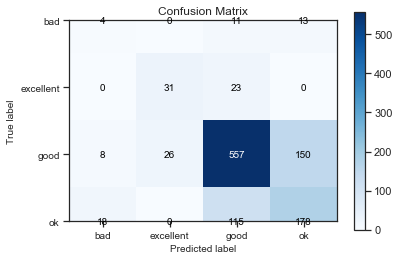

In [112]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

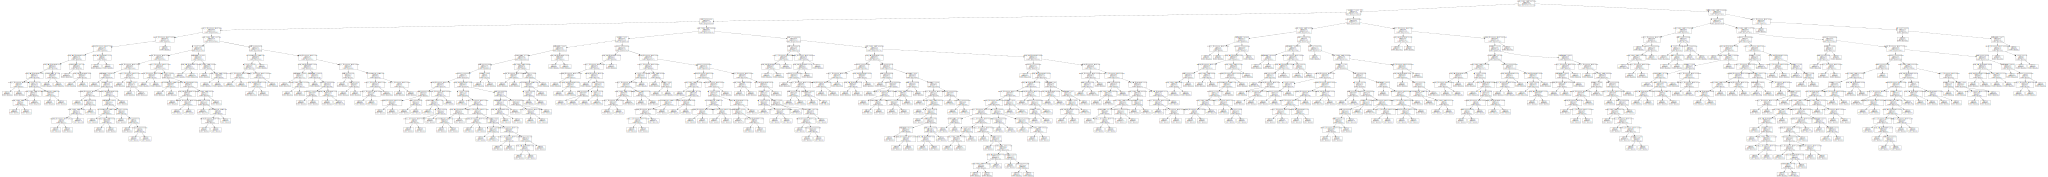

In [113]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

Accuracy = 67%

Takeaways
- Decision Tree
    - R Score: .675

## Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7486772486772487

In [115]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7486772486772487
[[  0   0  15  13]
 [  0  27  27   0]
 [  0   6 678  57]
 [  1   0 166 144]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        28
   excellent       0.82      0.50      0.62        54
        good       0.77      0.91      0.83       741
          ok       0.67      0.46      0.55       311

    accuracy                           0.75      1134
   macro avg       0.56      0.47      0.50      1134
weighted avg       0.72      0.75      0.72      1134



Accuracy = 75%

Takeaways
- Decision Tree
    - R Score: .752

## Feature Importance

In [116]:
# another method
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
num_voted_users           0.144      
duration                  0.089      
gross                     0.074      
budget                    0.071      
num_user_for_reviews      0.062      
num_critic_for_reviews    0.057      
Profit                    0.056      
director_facebook_likes   0.056      
Profit_Margin             0.054      
actor_3_facebook_likes    0.053      
cast_total_facebook_likes 0.051      
title_year                0.048      
movie_facebook_likes      0.045      
actor_1_facebook_likes    0.043      
actor_2_facebook_likes    0.042      
facenumber_in_poster      0.026      
content_rating_PG-13      0.009      
content_rating_R          0.008      
content_rating_PG         0.007      
content_rating_G          0.003      
content_rating_Unrated    0.001      
content_rating_NC-17      0.001

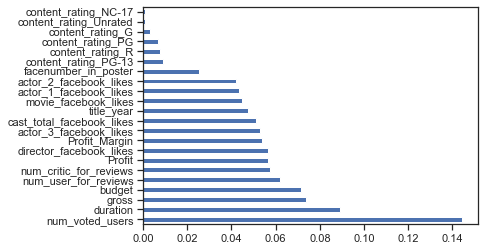

In [117]:
pd.DataFrame(clf.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

Takeaways
- Feature Importance
    - Number of Voted Users
    - Duration
    - Gross
    - number of user reviews

In [118]:
#Predict class probabilities for X
clf.predict_proba(X_test)
# 1st value: the probability of NO
# 2nd value: the probability of YES (2nd heart attack)

array([[0.  , 0.2 , 0.8 , 0.  ],
       [0.05, 0.  , 0.6 , 0.35],
       [0.15, 0.  , 0.45, 0.4 ],
       ...,
       [0.  , 0.3 , 0.65, 0.05],
       [0.1 , 0.35, 0.5 , 0.05],
       [0.  , 0.  , 0.6 , 0.4 ]])

## Support Vector Machine (SVM)

In [119]:
svm = SVC(gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [120]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, svm.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, svm.predict(X_test)))
print("--------------------------------------------------------")

0.6534391534391535
--------------------------------------------------------
[[  0   0  28   0]
 [  0   0  54   0]
 [  0   0 741   0]
 [  0   1 310   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        28
   excellent       0.00      0.00      0.00        54
        good       0.65      1.00      0.79       741
          ok       0.00      0.00      0.00       311

    accuracy                           0.65      1134
   macro avg       0.16      0.25      0.20      1134
weighted avg       0.43      0.65      0.52      1134

--------------------------------------------------------


In [121]:
# 10-fold cross-validation
svm = SVC(gamma='auto')

scores = cross_val_score(svm, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.65699208 0.65171504 0.65171504 0.65699208 0.65699208 0.66402116
 0.65782493 0.65517241 0.65957447 0.66755319]
0.6578552503529564


Accuracy = 65%

Takeaways
- Decision Tree
    - R Score: .653

## Logistic regression

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression(solver='lbfgs', max_iter=500,multi_class='auto')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))


0.6516754850088183
[[  0   0  21   0]
 [  0  27  27   0]
 [  0  36 667  33]
 [  0   1 277  45]]
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        21
   excellent       0.42      0.50      0.46        54
        good       0.67      0.91      0.77       736
          ok       0.58      0.14      0.22       323

    accuracy                           0.65      1134
   macro avg       0.42      0.39      0.36      1134
weighted avg       0.62      0.65      0.59      1134



In [124]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print(probs)
#1st column: probability of NOT having 2nd heart attack
#2nd column: probabiility of having 2nd heart attack

[[2.79033251e-06 1.65146761e-02 7.30264340e-01 2.53218194e-01]
 [9.21809496e-04 3.03069787e-01 5.74136777e-01 1.21871627e-01]
 [1.95692590e-01 2.23197635e-01 3.02549865e-01 2.78559910e-01]
 ...
 [5.56460548e-02 2.18773071e-02 5.77944838e-01 3.44531800e-01]
 [1.78477741e-01 1.58585218e-01 3.35363344e-01 3.27573697e-01]
 [1.94762542e-03 1.23678547e-01 6.83899659e-01 1.90474168e-01]]


Accuracy = 65%

Takeaways
- Decision Tree
    - R Score: .651
    - Accuracy = 65%

## k-Nearest Neighbor (KNN) 

In [125]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
# IQ is at zero currently
knn = KNeighborsClassifier()

#Build Model 
# Train a decision tree model
knn = knn.fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.5987654320987654
--------------------------------------------------------
[[  0   0  20   8]
 [  0   5  46   3]
 [  4   9 606 122]
 [  1   2 240  68]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        28
   excellent       0.31      0.09      0.14        54
        good       0.66      0.82      0.73       741
          ok       0.34      0.22      0.27       311

    accuracy                           0.60      1134
   macro avg       0.33      0.28      0.29      1134
weighted avg       0.54      0.60      0.56      1134

--------------------------------------------------------


Takeaways
- Decision Tree
    - R Score: .598
    - Accuracy = 60%

## GradientBoostingClassifier

In [127]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize 
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [128]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, gb.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, gb.predict(X_test)))
print("--------------------------------------------------------")


# y-test is the acual y value in the testing dataset
# gb.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.7610229276895943
--------------------------------------------------------
[[  0   0   5  16]
 [  0  27  27   0]
 [  0   3 662  71]
 [  1   0 148 174]]
--------------------------------------------------------
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        21
   excellent       0.90      0.50      0.64        54
        good       0.79      0.90      0.84       736
          ok       0.67      0.54      0.60       323

    accuracy                           0.76      1134
   macro avg       0.59      0.48      0.52      1134
weighted avg       0.74      0.76      0.74      1134

--------------------------------------------------------


In [129]:
# 10-fold cross-validation
scores = cross_val_score(gb, X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.73878628 0.75725594 0.77308707 0.76781003 0.80474934 0.76190476
 0.71087533 0.71087533 0.64361702 0.6143617 ]
0.7283322802792552


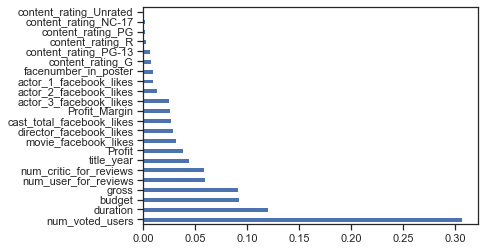

In [130]:
pd.DataFrame(gb.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False).plot(kind='barh', 
                                                                                                            legend=None);

Takeaways
- Decision Tree
    - R Score: .761
    - Accuracy = 76%

# 3. Clustering 

## Import Data

In [131]:
dfcu=pd.read_csv('data/imdbdatadf.csv')
dfcu.head()

director_name  num_critic_for_reviews  duration  \
0  Ekachai Uekrongtham  66                      96         
1  Chan-wook Park       202                     112        
2  Lajos Koltai         73                      134        
3  Yimou Zhang          136                     146        
4  Amy Heckerling       54                      92         

   director_facebook_likes  actor_3_facebook_likes     actor_2_name  \
0  3                        305                     Mike Dopud        
1  0                        38                      Yeong-ae Lee      
2  45                       0                       Péter Fancsikai   
3  611                      28                      Ni Ni             
4  143                      613                     Justin Kirk       

   actor_1_facebook_likes   gross                     genres  \
0  2000                    162     Action|Crime|Thriller       
1  717                     211667  Crime|Drama                 
2  9                       195888  Drama|Romance|War           
3  23000                   9213    Drama|History|Romance|War   
4  1000                    2964    Comedy|Horror|Romance       

        actor_1_name          movie_title  num_voted_users  \
0  Michael Jai White  Skin Trade           5228              
1  Min-sik Choi       Lady Vengeance       53508             
2  Marcell Nagy       Fateless             5603              
3  Christian Bale     The Flowers of War   38690             
4  Taylor Negron      Vamps                7444              

   cast_total_facebook_likes      actor_3_name  facenumber_in_poster  \
0  2802                       Celina Jade       5                      
1  907                        Hye-jeong Kang    0                      
2  11                         Bálint Péntek     0                      
3  23240                      Shigeo Kobayashi  2                      
4  3086                       Ivan Sergei       2                      

                                                                 plot_keywords  \
0  bangkok thailand|detective|human trafficking|revenge|sex slavery              
1  cake|christian|lesbian sex|oral sex|pregnant schoolgirl                       
2  bus|death|gay slur|hatred|jewish                                              
3  abusive stepfather|attempted rape|food shortage|sexual abuse|starving child   
4  murder|new york city|one word title|vampire|vampire slayer                    

   num_user_for_reviews      country content_rating      budget  title_year  \
0  38                    Thailand     R              9000000     2014         
1  131                   South Korea  R              4200000000  2005         
2  45                    Hungary      R              2500000000  2005         
3  130                   China        R              94000000    2011         
4  42                    USA          PG-13          16000000    2012         

   actor_2_facebook_likes  imdb_score  movie_facebook_likes      Profit  \
0  368                    5.700        0                    -8999838      
1  126                    7.700        4000                 -4199788333   
2  2                      7.100        607                  -2499804112   
3  196                    7.600        13000                -93990787     
4  945                    5.100        0                    -15997036     

   Profit_Margin  
0 -55554.560      
1 -19841.490      
2 -12761.390      
3 -10201.970      
4 -5397.110

In [132]:
dfcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 26 columns):
director_name                3778 non-null object
num_critic_for_reviews       3778 non-null int64
duration                     3778 non-null int64
director_facebook_likes      3778 non-null int64
actor_3_facebook_likes       3778 non-null int64
actor_2_name                 3778 non-null object
actor_1_facebook_likes       3778 non-null int64
gross                        3778 non-null int64
genres                       3778 non-null object
actor_1_name                 3778 non-null object
movie_title                  3778 non-null object
num_voted_users              3778 non-null int64
cast_total_facebook_likes    3778 non-null int64
actor_3_name                 3778 non-null object
facenumber_in_poster         3778 non-null int64
plot_keywords                3778 non-null object
num_user_for_reviews         3778 non-null int64
country                      3778 non-null object
con

Identify Objects 

## Data Editing 

In [133]:
dfclu = dfcu.drop(['director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country','content_rating'], axis =1)
dfclu.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  66                      96        3                         
1  202                     112       0                         
2  73                      134       45                        
3  136                     146       611                       
4  54                      92        143                       

   actor_3_facebook_likes  actor_1_facebook_likes   gross  num_voted_users  \
0  305                     2000                    162     5228              
1  38                      717                     211667  53508             
2  0                       9                       195888  5603              
3  28                      23000                   9213    38690             
4  613                     1000                    2964    7444              

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0  2802                       5                     38                     
1  907                        0                     131                    
2  11                         0                     45                     
3  23240                      2                     130                    
4  3086                       2                     42                     

       budget  title_year  actor_2_facebook_likes  imdb_score  \
0  9000000     2014        368                    5.700         
1  4200000000  2005        126                    7.700         
2  2500000000  2005        2                      7.100         
3  94000000    2011        196                    7.600         
4  16000000    2012        945                    5.100         

   movie_facebook_likes      Profit  Profit_Margin  
0  0                    -8999838    -55554.560      
1  4000                 -4199788333 -19841.490      
2  607                  -2499804112 -12761.390      
3  13000                -93990787   -10201.970      
4  0                    -15997036   -5397.110

remove object variables 

In [134]:
dfclu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 17 columns):
num_critic_for_reviews       3778 non-null int64
duration                     3778 non-null int64
director_facebook_likes      3778 non-null int64
actor_3_facebook_likes       3778 non-null int64
actor_1_facebook_likes       3778 non-null int64
gross                        3778 non-null int64
num_voted_users              3778 non-null int64
cast_total_facebook_likes    3778 non-null int64
facenumber_in_poster         3778 non-null int64
num_user_for_reviews         3778 non-null int64
budget                       3778 non-null int64
title_year                   3778 non-null int64
actor_2_facebook_likes       3778 non-null int64
imdb_score                   3778 non-null float64
movie_facebook_likes         3778 non-null int64
Profit                       3778 non-null int64
Profit_Margin                3778 non-null float64
dtypes: float64(2), int64(15)
memory usage: 501.8 KB


## Normalize 

In [135]:
df_norm = (dfclu - dfclu.mean()) / (dfclu.std())
df_norm.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0 -0.804                  -0.622    -0.260                     
1 0.296                   0.085     -0.261                     
2 -0.748                  1.057     -0.247                     
3 -0.238                  1.586     -0.061                     
4 -0.901                  -0.798    -0.215                     

   actor_3_facebook_likes  actor_1_facebook_likes  gross  num_voted_users  \
0 -0.244                  -0.367                  -0.746 -0.655             
1 -0.388                  -0.450                  -0.743 -0.336             
2 -0.408                  -0.495                  -0.743 -0.653             
3 -0.393                  0.987                   -0.745 -0.434             
4 -0.078                  -0.431                  -0.746 -0.641             

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0 -0.452                     1.777                 -0.717                  
1 -0.552                     -0.673                -0.491                  
2 -0.599                     -0.673                -0.700                  
3 0.621                      0.307                 -0.493                  
4 -0.437                     0.307                 -0.708                  

   budget  title_year  actor_2_facebook_likes  imdb_score  \
0 -0.311  1.110       -0.360                  -0.724        
1 38.659  0.200       -0.414                  1.175         
2 22.851  0.200       -0.441                  0.605         
3 0.479   0.807       -0.398                  1.080         
4 -0.246  0.908       -0.232                  -1.293        

   movie_facebook_likes  Profit  Profit_Margin  
0 -0.431                -0.162  -54.603         
1 -0.244                -36.981 -19.471         
2 -0.403                -22.045 -12.506         
3 0.175                 -0.909  -9.989          
4 -0.431                -0.223  -5.262

## Elbow Method 

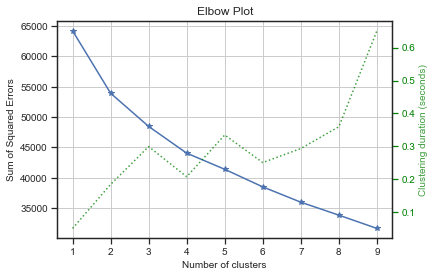

In [136]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

Choose 2 3 or 4 clusters 

## K-means

In [137]:
df_norm.var()

num_critic_for_reviews      1.000
duration                    1.000
director_facebook_likes     1.000
actor_3_facebook_likes      1.000
actor_1_facebook_likes      1.000
gross                       1.000
num_voted_users             1.000
cast_total_facebook_likes   1.000
facenumber_in_poster        1.000
num_user_for_reviews        1.000
budget                      1.000
title_year                  1.000
actor_2_facebook_likes      1.000
imdb_score                  1.000
movie_facebook_likes        1.000
Profit                      1.000
Profit_Margin               1.000
dtype: float64

In [138]:
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)

4 cluster k means 

In [139]:
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [140]:
k_means.labels_

array([2, 2, 2, ..., 1, 0, 1])

In [141]:
k_means.cluster_centers_

array([[-3.09990871e-01, -1.61655882e-01, -1.25848662e-01,
        -1.72932640e-01, -1.21426615e-01, -2.58688265e-01,
        -3.31544811e-01, -1.64475553e-01,  1.69646042e-03,
        -2.89723725e-01, -1.06009025e-01, -6.98122598e-02,
        -1.68516637e-01, -1.82897813e-01, -2.64644299e-01,
        -5.81386929e-02,  1.98611647e-02],
       [ 1.38726697e+00,  7.39858886e-01,  5.54781294e-01,
        -3.43180023e-02,  2.75714726e-01,  1.11075749e+00,
         1.51237968e+00,  2.96130682e-01, -1.15723392e-01,
         1.34169879e+00,  2.96040931e-01,  2.54381101e-01,
         2.95710045e-01,  8.78292973e-01,  1.16577851e+00,
         4.00000218e-01,  4.43720432e-02],
       [-3.35195513e-01,  2.52832905e-01,  1.39614174e-01,
        -2.80363406e-01, -4.42850834e-01, -7.36626109e-01,
        -2.93461297e-01, -5.21351157e-01, -8.53937809e-02,
        -3.89043194e-01,  2.05016156e+01,  2.00192720e-01,
        -3.66990438e-01,  6.62191205e-01, -2.76268776e-01,
        -1.98216129e+01, -1.8

place clusters into data frame 

In [142]:
df2 = dfclu.copy()
df2["cluster"]=k_means.labels_
df2.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  66                      96        3                         
1  202                     112       0                         
2  73                      134       45                        
3  136                     146       611                       
4  54                      92        143                       

   actor_3_facebook_likes  actor_1_facebook_likes   gross  num_voted_users  \
0  305                     2000                    162     5228              
1  38                      717                     211667  53508             
2  0                       9                       195888  5603              
3  28                      23000                   9213    38690             
4  613                     1000                    2964    7444              

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0  2802                       5                     38                     
1  907                        0                     131                    
2  11                         0                     45                     
3  23240                      2                     130                    
4  3086                       2                     42                     

       budget  title_year  actor_2_facebook_likes  imdb_score  \
0  9000000     2014        368                    5.700         
1  4200000000  2005        126                    7.700         
2  2500000000  2005        2                      7.100         
3  94000000    2011        196                    7.600         
4  16000000    2012        945                    5.100         

   movie_facebook_likes      Profit  Profit_Margin  cluster  
0  0                    -8999838    -55554.560      2        
1  4000                 -4199788333 -19841.490      2        
2  607                  -2499804112 -12761.390      2        
3  13000                -93990787   -10201.970      0        
4  0                    -15997036   -5397.110       0

In [143]:
df2.tail()

num_critic_for_reviews  duration  director_facebook_likes  \
3773  277                     88        365                       
3774  36                      98        0                         
3775  360                     81        19                        
3776  72                      88        20                        
3777  409                     84        110                       

      actor_3_facebook_likes  actor_1_facebook_likes      gross  \
3773  177                     383                     30859000    
3774  73                      138                     10246600    
3775  39                      170                     140530114   
3776  0                       58                      592014      
3777  21                      189                     107917283   

      num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
3773  96411            1094                       0                      
3774  6375             388                        0                      
3775  186786           399                        0                      
3776  5709             78                         3                      
3777  184824           330                        0                      

      num_user_for_reviews  budget  title_year  actor_2_facebook_likes  \
3773  826                   83532   1974        371                      
3774  36                    25000   1995        111                      
3775  3400                  60000   1999        170                      
3776  114                   218     2003        20                       
3777  1189                  15000   2007        109                      

      imdb_score  movie_facebook_likes     Profit  Profit_Margin  cluster  
3773 7.500        0                     30775468  1.000           0        
3774 6.600        265                   10221600  1.000           0        
3775 6.400        0                     140470114 1.000           1        
3776 7.200        754                   591796    1.000           0        
3777 6.300        12000                 107902283 1.000           1

Pivot Table averages into cluster segments 

In [144]:
df2.groupby(['cluster']).mean() 

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0       127.116                 106.414   414.063                    
1       336.960                 126.829   2493.767                   
2       124.000                 115.800   1225.200                   
3       298.642                 120.303   2238.156                   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0       437.226                 5806.555                33912174.625    
1       694.539                 11966.052               129295631.960   
2       237.800                 821.400                 623259.200      
3       10154.284               37348.624               134029012.560   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0       54166.495        8278.981                   1.378                   
1       332913.546       17048.755                  1.138                   
2       59923.600        1484.200                   1.200                   
3       254137.734       68777.624                  2.587                   

         num_user_for_reviews         budget  title_year  \
cluster                                                    
0       213.311               31096891.454   2002.330      
1       882.038               74334575.403   2005.536      
2       172.600               2247303979.600 2005.000      
3       644.229               86182568.807   2008.459      

         actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
cluster                                                             
0       1231.030                6.270       3565.345                
1       3323.085                7.388       34247.920               
2       336.600                 7.160       3316.000                
3       16059.110               6.743       31155.202               

                 Profit  Profit_Margin  
cluster                                 
0       2815283.171     -27.885         
1       54961056.557    -2.968          
2       -2246680720.400 -18876.782      
3       47846443.752    -0.428

Pivot Table counts into cluster segments 

In [145]:
df2.groupby('cluster').size()

cluster
0    3063
1    601 
2    5   
3    109 
dtype: int64

Visualize clusters 

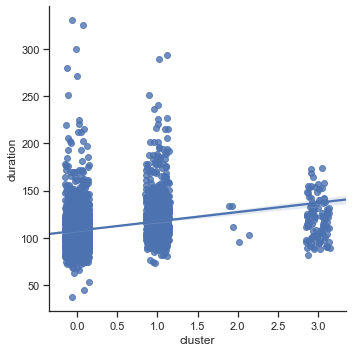

In [146]:
sns.lmplot("cluster", "duration", df2, x_jitter=.15, y_jitter=.15)

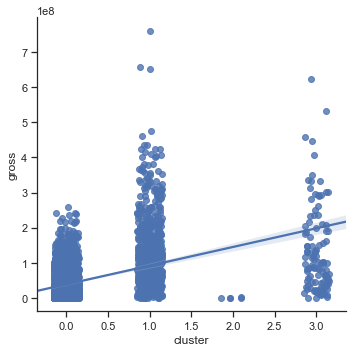

In [147]:
sns.lmplot("cluster", "gross", df2, x_jitter=.15, y_jitter=.15)

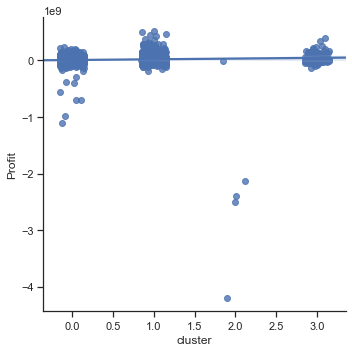

In [148]:
sns.lmplot("cluster", "Profit", df2, x_jitter=.15, y_jitter=.15)

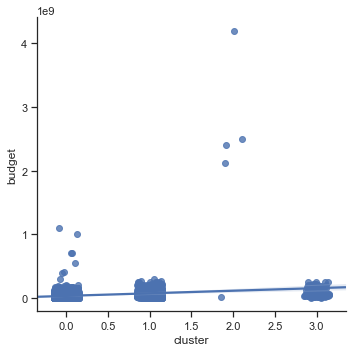

In [149]:
sns.lmplot("cluster", "budget", df2, x_jitter=.15, y_jitter=.15)

In [150]:
df2.to_csv("data/imdbdataKMeansData.csv")

## Hierarchical Clustering (3 Clusters)

In [151]:
X = df_norm

make normalized data as X 

graph to determine how many clusters to choose 

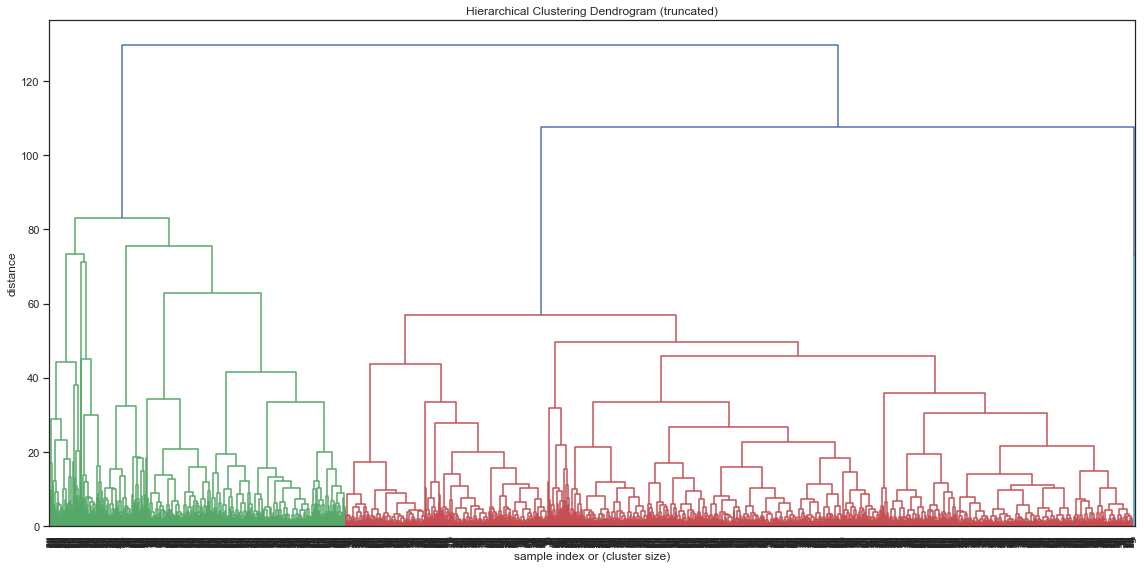

In [152]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')


linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

In [153]:
np.random.seed(1) # setting random seed to get the same results each time.



agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 2, 0], dtype=int64)

Add clusters into data frame 

In [154]:
df3 = dfclu.copy()
df3["cluster"]=agg.labels_
df3.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  66                      96        3                         
1  202                     112       0                         
2  73                      134       45                        
3  136                     146       611                       
4  54                      92        143                       

   actor_3_facebook_likes  actor_1_facebook_likes   gross  num_voted_users  \
0  305                     2000                    162     5228              
1  38                      717                     211667  53508             
2  0                       9                       195888  5603              
3  28                      23000                   9213    38690             
4  613                     1000                    2964    7444              

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0  2802                       5                     38                     
1  907                        0                     131                    
2  11                         0                     45                     
3  23240                      2                     130                    
4  3086                       2                     42                     

       budget  title_year  actor_2_facebook_likes  imdb_score  \
0  9000000     2014        368                    5.700         
1  4200000000  2005        126                    7.700         
2  2500000000  2005        2                      7.100         
3  94000000    2011        196                    7.600         
4  16000000    2012        945                    5.100         

   movie_facebook_likes      Profit  Profit_Margin  cluster  
0  0                    -8999838    -55554.560      1        
1  4000                 -4199788333 -19841.490      1        
2  607                  -2499804112 -12761.390      1        
3  13000                -93990787   -10201.970      2        
4  0                    -15997036   -5397.110       2

In [155]:
df3.groupby(['cluster']).mean().T

cluster                              0               1            2
num_critic_for_reviews    286.483      124.000         119.946     
duration                  118.671      115.800         106.828     
director_facebook_likes   2541.251     1225.200        141.706     
actor_3_facebook_likes    1699.672     237.800         404.742     
actor_1_facebook_likes    14829.345    821.400         5014.298    
gross                     98677991.728 623259.200      34422889.672
num_voted_users           240572.871   59923.600       53054.661   
cast_total_facebook_likes 23492.451    1484.200        6879.742    
facenumber_in_poster      1.371        1.200           1.376       
num_user_for_reviews      650.473      172.600         212.481     
budget                    63465400.636 2247303979.600  30580979.528
title_year                2006.202     2005.000        2001.819    
actor_2_facebook_likes    5451.067     336.600         690.536     
imdb_score                7.033        7.160           6.246       
movie_facebook_likes      27195.828    3316.000        2493.059    
Profit                    35212591.092 -2246680720.400 3841910.144 
Profit_Margin             -7.093       -18876.782      -29.158

In [156]:
df3.groupby('cluster').size()

cluster
0    1032
1    5   
2    2741
dtype: int64

In [157]:
df3[df3['cluster'] == 1]

num_critic_for_reviews  duration  director_facebook_likes  \
0   66                      96        3                         
1   202                     112       0                         
2   73                      134       45                        
6   105                     103       78                        
22  174                     134       6000                      

    actor_3_facebook_likes  actor_1_facebook_likes    gross  num_voted_users  \
0   305                     2000                    162      5228              
1   38                      717                     211667   53508             
2   0                       9                       195888   5603              
6   101                     488                     410388   13727             
22  745                     893                     2298191  221552            

    cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0   2802                       5                     38                     
1   907                        0                     131                    
2   11                         0                     45                     
6   991                        1                     79                     
22  2710                       0                     570                    

        budget  title_year  actor_2_facebook_likes  imdb_score  \
0   9000000     2014        368                    5.700         
1   4200000000  2005        126                    7.700         
2   2500000000  2005        2                      7.100         
6   2127519898  2004        336                    6.900         
22  2400000000  1997        851                    8.400         

    movie_facebook_likes      Profit  Profit_Margin  cluster  
0   0                    -8999838    -55554.560      1        
1   4000                 -4199788333 -19841.490      1        
2   607                  -2499804112 -12761.390      1        
6   973                  -2127109510 -5183.170       1        
22  11000                -2397701809 -1043.300       1

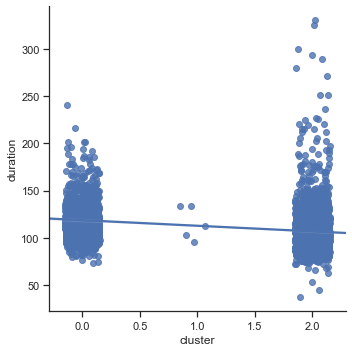

In [158]:
sns.lmplot("cluster", "duration", df3, x_jitter=.15, y_jitter=.15)

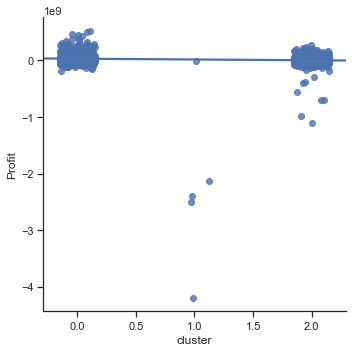

In [159]:
sns.lmplot("cluster", "Profit", df3, x_jitter=.15, y_jitter=.15)

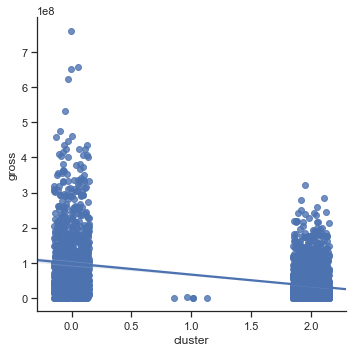

In [160]:
sns.lmplot("cluster", "gross", df3, x_jitter=.15, y_jitter=.15)

In [161]:
df3.to_csv("data/imdbdataHierClusData.csv")

## Hierarchical Clustering (2 Clusters) Removed Outliers.

In [162]:
dfcu=pd.read_csv('data/imdbdatadfc2.csv')
dfcu.head()

director_name  num_critic_for_reviews  duration  director_facebook_likes  \
0  Yimou Zhang      136                     146       611                       
1  Amy Heckerling   54                      92        143                       
2  Jonathan Newman  28                      100       3                         
3  Tony Scott       142                     114       12000                     
4  Tony Jaa         110                     110       0                         

   actor_3_facebook_likes         actor_2_name  actor_1_facebook_likes  \
0  28                      Ni Ni                23000                    
1  613                     Justin Kirk          1000                     
2  88                      Keeley Hawes         2000                     
3  307                     Stephen Dillane      11000                    
4  7                       Petchtai Wongkamlao  64                       

    gross                     genres      actor_1_name  \
0  9213    Drama|History|Romance|War  Christian Bale     
1  2964    Comedy|Horror|Romance      Taylor Negron      
2  4756    Adventure|Family|Fantasy   Ioan Gruffudd      
3  26871   Action|Crime|Thriller      Brad Pitt          
4  102055  Action                     Nirut Sirichanya   

                                   movie_title  num_voted_users  \
0  The Flowers of War                           38690             
1  Vamps                                        7444              
2  The Adventurer: The Curse of the Midas Box   4191              
3  Spy Game                                     121259            
4  Ong-bak 2                                    24570             

   cast_total_facebook_likes          actor_3_name  facenumber_in_poster  \
0  23240                      Shigeo Kobayashi      2                      
1  3086                       Ivan Sergei           2                      
2  2450                       Oliver Stark          4                      
3  12499                      Catherine McCormack   2                      
4  134                        Sarunyu Wongkrachang  0                      

                                                                 plot_keywords  \
0  abusive stepfather|attempted rape|food shortage|sexual abuse|starving child   
1  murder|new york city|one word title|vampire|vampire slayer                    
2  based on novel|drowning|hanging from a flagpole|hanging from a rope|magic     
3  china|cia|cold war|friendship|retirement                                      
4  cult film|elephant|jungle|martial arts|stylized violence                      

   num_user_for_reviews   country content_rating     budget  title_year  \
0  130                   China     R              94000000   2011         
1  42                    USA       PG-13          16000000   2012         
2  32                    UK        PG             25000000   2013         
3  361                   Germany   R              92000000   2001         
4  72                    Thailand  R              300000000  2008         

   actor_2_facebook_likes  imdb_score  movie_facebook_likes     Profit  \
0  196                    7.600        13000                -93990787    
1  945                    5.100        0                    -15997036    
2  228                    5.400        0                    -24995244    
3  577                    7.000        0                    -91973129    
4  45                     6.200        0                    -299897945   

   Profit_Margin  
0 -10201.970      
1 -5397.110       
2 -5255.520       
3 -3422.770       
4 -2938.590

In [163]:
dfclu = dfcu.drop(['director_name','actor_2_name','actor_1_name','movie_title','genres','actor_3_name','plot_keywords','country','content_rating'], axis =1)
dfclu.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  136                     146       611                       
1  54                      92        143                       
2  28                      100       3                         
3  142                     114       12000                     
4  110                     110       0                         

   actor_3_facebook_likes  actor_1_facebook_likes   gross  num_voted_users  \
0  28                      23000                   9213    38690             
1  613                     1000                    2964    7444              
2  88                      2000                    4756    4191              
3  307                     11000                   26871   121259            
4  7                       64                      102055  24570             

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0  23240                      2                     130                    
1  3086                       2                     42                     
2  2450                       4                     32                     
3  12499                      2                     361                    
4  134                        0                     72                     

      budget  title_year  actor_2_facebook_likes  imdb_score  \
0  94000000   2011        196                    7.600         
1  16000000   2012        945                    5.100         
2  25000000   2013        228                    5.400         
3  92000000   2001        577                    7.000         
4  300000000  2008        45                     6.200         

   movie_facebook_likes     Profit  Profit_Margin  
0  13000                -93990787  -10201.970      
1  0                    -15997036  -5397.110       
2  0                    -24995244  -5255.520       
3  0                    -91973129  -3422.770       
4  0                    -299897945 -2938.590

In [164]:
df4 = df3.copy()
df4 = df4[df4['cluster']!= 1 ].copy()
df4 = ((df4-df4.mean()) / df4.std())
df4.drop('cluster',axis=1,inplace=True)
X = df4.copy()

Dropped Cluster one from above data frame

In [165]:
np.random.seed(1) # setting random seed to get the same results each time.



agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [166]:
df5 = dfclu.copy()
df5["cluster"]=agg.labels_
df5.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0  136                     146       611                       
1  54                      92        143                       
2  28                      100       3                         
3  142                     114       12000                     
4  110                     110       0                         

   actor_3_facebook_likes  actor_1_facebook_likes   gross  num_voted_users  \
0  28                      23000                   9213    38690             
1  613                     1000                    2964    7444              
2  88                      2000                    4756    4191              
3  307                     11000                   26871   121259            
4  7                       64                      102055  24570             

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  \
0  23240                      2                     130                    
1  3086                       2                     42                     
2  2450                       4                     32                     
3  12499                      2                     361                    
4  134                        0                     72                     

      budget  title_year  actor_2_facebook_likes  imdb_score  \
0  94000000   2011        196                    7.600         
1  16000000   2012        945                    5.100         
2  25000000   2013        228                    5.400         
3  92000000   2001        577                    7.000         
4  300000000  2008        45                     6.200         

   movie_facebook_likes     Profit  Profit_Margin  cluster  
0  13000                -93990787  -10201.970      1        
1  0                    -15997036  -5397.110       1        
2  0                    -24995244  -5255.520       1        
3  0                    -91973129  -3422.770       1        
4  0                    -299897945 -2938.590       1

Added cluster into df


In [167]:
df5.groupby(['cluster']).mean().T 

cluster                               0            1
num_critic_for_reviews    280.203       123.794     
duration                  117.467       107.377     
director_facebook_likes   2587.767      147.342     
actor_3_facebook_likes    1725.465      407.532     
actor_1_facebook_likes    14508.526     5223.166    
gross                     101129600.674 34135326.988
num_voted_users           245897.349    52880.844   
cast_total_facebook_likes 23276.721     7114.276    
facenumber_in_poster      1.332         1.390       
num_user_for_reviews      675.084       207.649     
budget                    60006578.982  32147502.669
title_year                2005.234      2002.213    
actor_2_facebook_likes    5504.530      715.831     
imdb_score                7.090         6.233       
movie_facebook_likes      25473.255     3351.454    
Profit                    41123021.692  1987824.319 
Profit_Margin             -3.422        -30.285

In [168]:
df5.groupby('cluster').size() 

cluster
0    1006
1    2767
dtype: int64

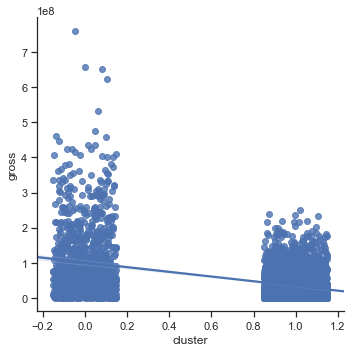

In [169]:
sns.lmplot("cluster", "gross", df5, x_jitter=.15, y_jitter=.15)

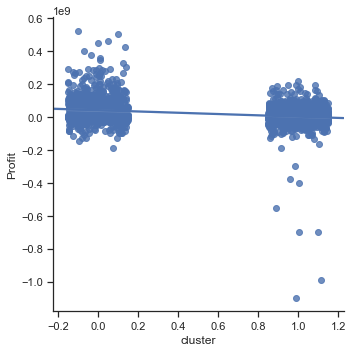

In [170]:
sns.lmplot("cluster", "Profit", df5, x_jitter=.15, y_jitter=.15)

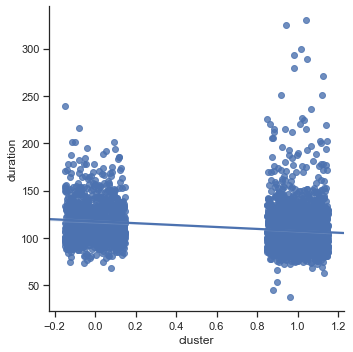

In [171]:
sns.lmplot("cluster", "duration", df5, x_jitter=.15, y_jitter=.15)

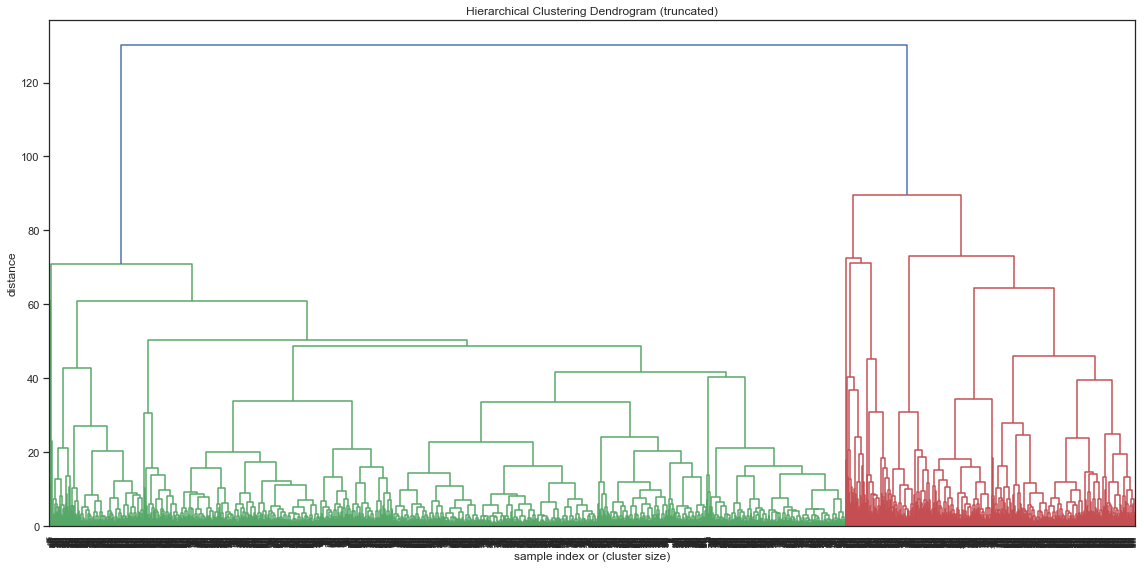

In [172]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')


linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

##  Clustering Analysis 



### K-Means

In [173]:
df2.groupby('cluster').size() 

cluster
0    3063
1    601 
2    5   
3    109 
dtype: int64

In [174]:
df2.groupby(['cluster']).mean() 

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0       127.116                 106.414   414.063                    
1       336.960                 126.829   2493.767                   
2       124.000                 115.800   1225.200                   
3       298.642                 120.303   2238.156                   

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0       437.226                 5806.555                33912174.625    
1       694.539                 11966.052               129295631.960   
2       237.800                 821.400                 623259.200      
3       10154.284               37348.624               134029012.560   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0       54166.495        8278.981                   1.378                   
1       332913.546       17048.755                  1.138                   
2       59923.600        1484.200                   1.200                   
3       254137.734       68777.624                  2.587                   

         num_user_for_reviews         budget  title_year  \
cluster                                                    
0       213.311               31096891.454   2002.330      
1       882.038               74334575.403   2005.536      
2       172.600               2247303979.600 2005.000      
3       644.229               86182568.807   2008.459      

         actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
cluster                                                             
0       1231.030                6.270       3565.345                
1       3323.085                7.388       34247.920               
2       336.600                 7.160       3316.000                
3       16059.110               6.743       31155.202               

                 Profit  Profit_Margin  
cluster                                 
0       2815283.171     -27.885         
1       54961056.557    -2.968          
2       -2246680720.400 -18876.782      
3       47846443.752    -0.428

### Hierarchical 1


In [175]:
df3.groupby('cluster').size() 

cluster
0    1032
1    5   
2    2741
dtype: int64

In [176]:
df3.groupby(['cluster']).mean() 

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0       286.483                 118.671   2541.251                   
1       124.000                 115.800   1225.200                   
2       119.946                 106.828   141.706                    

         actor_3_facebook_likes  actor_1_facebook_likes        gross  \
cluster                                                                
0       1699.672                14829.345               98677991.728   
1       237.800                 821.400                 623259.200     
2       404.742                 5014.298                34422889.672   

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0       240572.871       23492.451                  1.371                   
1       59923.600        1484.200                   1.200                   
2       53054.661        6879.742                   1.376                   

         num_user_for_reviews         budget  title_year  \
cluster                                                    
0       650.473               63465400.636   2006.202      
1       172.600               2247303979.600 2005.000      
2       212.481               30580979.528   2001.819      

         actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
cluster                                                             
0       5451.067                7.033       27195.828               
1       336.600                 7.160       3316.000                
2       690.536                 6.246       2493.059                

                 Profit  Profit_Margin  
cluster                                 
0       35212591.092    -7.093          
1       -2246680720.400 -18876.782      
2       3841910.144     -29.158

### Hierarchical 2

In [177]:
df5.groupby('cluster').size() 

cluster
0    1006
1    2767
dtype: int64

In [178]:
df5.groupby(['cluster']).mean() 

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0       280.203                 117.467   2587.767                   
1       123.794                 107.377   147.342                    

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0       1725.465                14508.526               101129600.674   
1       407.532                 5223.166                34135326.988    

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0       245897.349       23276.721                  1.332                   
1       52880.844        7114.276                   1.390                   

         num_user_for_reviews       budget  title_year  \
cluster                                                  
0       675.084               60006578.982 2005.234      
1       207.649               32147502.669 2002.213      

         actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
cluster                                                             
0       5504.530                7.090       25473.255               
1       715.831                 6.233       3351.454                

              Profit  Profit_Margin  
cluster                              
0       41123021.692 -3.422          
1       1987824.319  -30.285

# Storytelling

## Regression

Takeaways
- Random Forest Regressor is the best regression model to use with this dataframe
    - R Score: .938
    - Most Important Features: number of voted users/duration/budget/gross
    

## Classification

After binning IMDB scores into four categories and running the data through multiple classification methods. Random Forest method created the highest accuracy for the confusion matrix.  The overall accuracy of this model was 76%. The Bin “Good” had a True positive rate of 93% this model does a very good job of predicting Good when the actual score is Good. This model also has a Precision of 89% for Excellent, which means when the model predicted excellent it was 89% of the time correct. In conclusion this model shows signs of strength but can only be relied upon 76% of the time for all movies.  

## Clustering 

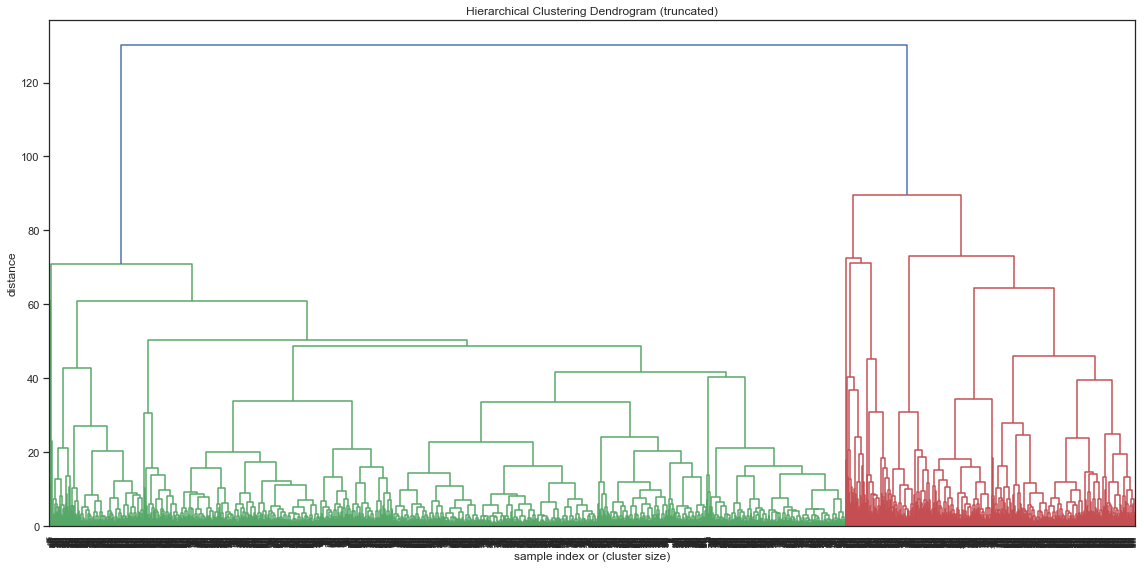

In [179]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')


linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

In [180]:
df5.groupby(['cluster']).mean() 

num_critic_for_reviews  duration  director_facebook_likes  \
cluster                                                              
0       280.203                 117.467   2587.767                   
1       123.794                 107.377   147.342                    

         actor_3_facebook_likes  actor_1_facebook_likes         gross  \
cluster                                                                 
0       1725.465                14508.526               101129600.674   
1       407.532                 5223.166                34135326.988    

         num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
cluster                                                                     
0       245897.349       23276.721                  1.332                   
1       52880.844        7114.276                   1.390                   

         num_user_for_reviews       budget  title_year  \
cluster                                                  
0       675.084               60006578.982 2005.234      
1       207.649               32147502.669 2002.213      

         actor_2_facebook_likes  imdb_score  movie_facebook_likes  \
cluster                                                             
0       5504.530                7.090       25473.255               
1       715.831                 6.233       3351.454                

              Profit  Profit_Margin  
cluster                              
0       41123021.692 -3.422          
1       1987824.319  -30.285

There are two main clusters 
- Cluster 0 are these factors over Cluster 1 
    - movies that scored higher IMDB scores
    - Longer duration
    - Higher budget
    - More critic reviews
    - More likes in all variables
    - Grossed more money
    - Less faces in posters
    - Newer Movies
    - Better profit margins


### Additional Storytelling 

The most important variables in the IMDB data set are:
   - num_critic_for_reviews'
   - 'gross' 
   - 'num_user_for_reviews'
   - 'budget'
   - 'duration'
   - 'num_voted_users'

My advice for business people in the movie industry is to get has many critics to review your movie, shoot for a large gross, presuaded users to review the movie, have a massive budget, make the movie longer, and get voted useres to review as well.


Other Variables I would need to predict better would be 
- what time of the year did this movie come out
- is this a sequal or a stand alone movie 
- what production company made the movie
